In [5]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Read the CSV file
file_path = "C://Users//user//OneDrive//Desktop//2011 Data Education^J Population^J Religion^J Workers.csv"
population_data = pd.read_csv(file_path)
population_data


,S.No.,State,Total_Population,Male_Population,Female_Population,Hindu_Population,Hindu_Males,Hindu_Females,Muslim_Population,Muslim_Males,...,Higher Secondary/Intermediate/Pre-University/Senior secondary_Males,Higher Secondary/Intermediate/Pre-University/Senior secondary_Females,Non-technical diploma or certificate not equal to degree_Males,Non-technical diploma or certificate not equal to degree_Females,Technical diploma or certificate not equal to degree_Males,Technical diploma or certificate not equal to degree_Females,Graduate & above_Males,Graduate & above_Females,X..2001 to 2011,Literacy_rates
0,1,State - JAMMU & KASHMIR,12541302,6640662,5900640,3566674,1987021,1579653,8567485,4428774,...,176494,136195,1629,555,11411,7009,121202,88895,23.636365,67.2
1,2,State - HIMACHAL PRADESH,6864602,3481873,3382729,6532765,3306995,3225770,149881,80763,...,98028,90877,456,283,10333,4696,33559,35183,12.943648,82.8
2,3,State - PUNJAB,27743338,14639465,13103873,10678138,5683894,4994244,535489,287534,...,291517,286756,2973,1349,44354,25638,126545,154988,13.893588,75.8
3,4,State - CHANDIGARH,1055450,580663,474787,852574,472769,379805,51447,29889,...,22093,18740,129,93,2568,885,16502,15685,17.189538,86.0
4,5,State - UTTARAKHAND,10086292,5137773,4948519,8368636,4234384,4134252,1406825,740057,...,127478,114180,817,479,10164,3320,103171,85971,18.811136,78.8
5,6,State - HARYANA,25351462,13494734,11856728,22171128,11821082,10350046,1781342,940027,...,390142,275593,5596,2233,55753,19685,212169,160774,19.895884,75.6
6,7,State - NCT OF DELHI,16787941,8987326,7800615,13712100,7353594,6358506,2158684,1163934,...,263754,213617,1759,1554,14278,9345,216965,170078,21.208133,86.2
7,8,State - RAJASTHAN,68548437,35550997,32997440,60657103,31485832,29171271,6215377,3193530,...,738345,396009,1616,989,54463,15316,403958,202391,21.309234,66.1
8,9,State - UTTAR PRADESH,199812341,104480510,95331831,159312654,83555724,75756930,38483967,19867314,...,2364063,1721464,19835,10528,66063,10872,1494499,875888,20.225536,67.7
9,10,State - BIHAR,104099452,54278157,49821295,86078686,44994505,41084181,17557809,9044086,...,1108211,525688,14518,6607,14063,2131,594635,205715,25.423280,61.8


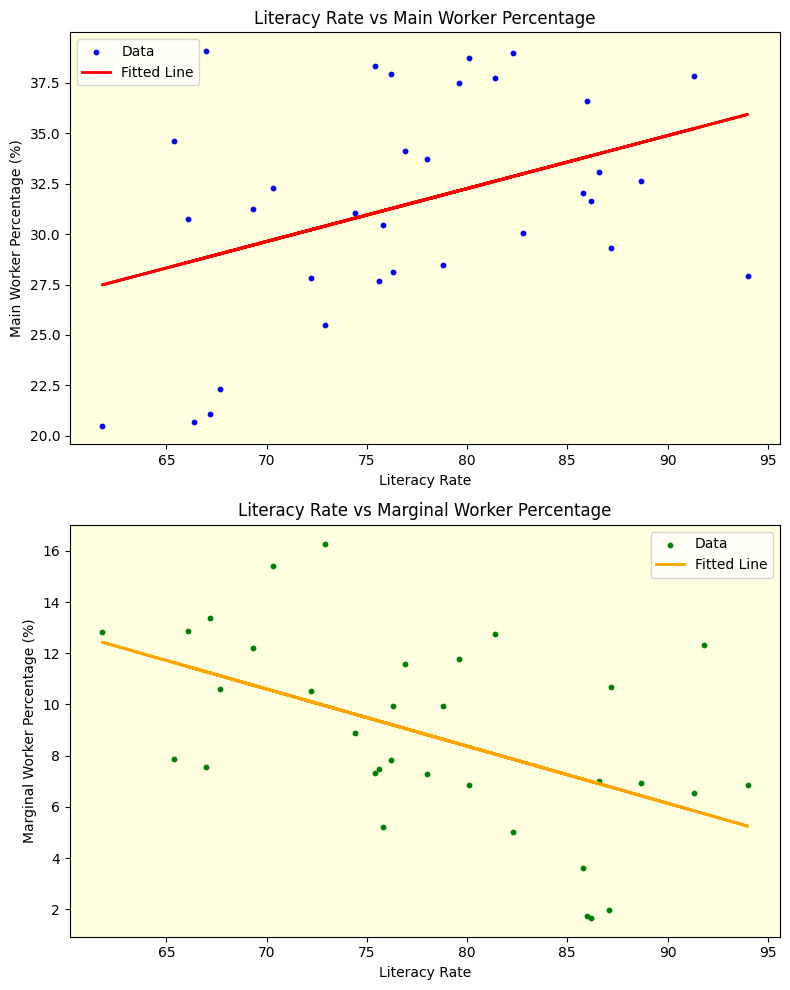

In [8]:
# Calculating percentages
population_data['main_worker_percentage'] = (population_data['Main_Workers_Population'] / population_data['Total_Population']) * 100
population_data['marginal_worker_percentage'] = (population_data['Marginal_Workers_Population'] / population_data['Total_Population']) * 100

# Handling outliers for main worker percentage
z_scores_main = stats.zscore(population_data['main_worker_percentage'])
outliers_main = (np.abs(z_scores_main) > 2)
population_data_clean_main = population_data[~outliers_main]


# Now Fitting a linear model to main worker percentage data without outliers
lm_main = sm.OLS.from_formula('main_worker_percentage ~ Literacy_rates', data=population_data_clean_main).fit()
predicted_main = lm_main.predict(population_data_clean_main['Literacy_rates'])

# Handling outliers for marginal worker percentage
z_scores_marginal = stats.zscore(population_data['marginal_worker_percentage'])
outliers_marginal = (np.abs(z_scores_marginal) > 2)
population_data_clean_marginal = population_data[~outliers_marginal]

# Fitted a linear model to marginal worker percentage data without outliers
lm_marginal = sm.OLS.from_formula('marginal_worker_percentage ~ Literacy_rates', data=population_data_clean_marginal).fit()
predicted_marginal = lm_marginal.predict(population_data_clean_marginal['Literacy_rates'])

# Setting up plot area with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plot 1: Literacy rate vs Main Worker Percentage
ax1.scatter(population_data_clean_main['Literacy_rates'], population_data_clean_main['main_worker_percentage'], color='blue', label='Data', s=10)
ax1.plot(population_data_clean_main['Literacy_rates'], predicted_main, color='red', linewidth=2, label='Fitted Line')
ax1.set_facecolor('lightyellow')
ax1.set_title('Literacy Rate vs Main Worker Percentage')
ax1.set_xlabel('Literacy Rate')
ax1.set_ylabel('Main Worker Percentage (%)')
ax1.legend()

# Plot 2: Literacy rate vs Marginal Worker Percentage
ax2.scatter(population_data_clean_marginal['Literacy_rates'], population_data_clean_marginal['marginal_worker_percentage'], color='green', label='Data', s=10)
ax2.plot(population_data_clean_marginal['Literacy_rates'], predicted_marginal, color='orange', linewidth=2, label='Fitted Line')
ax2.set_facecolor('lightyellow')
ax2.set_title('Literacy Rate vs Marginal Worker Percentage')
ax2.set_xlabel('Literacy Rate')
ax2.set_ylabel('Marginal Worker Percentage (%)')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()




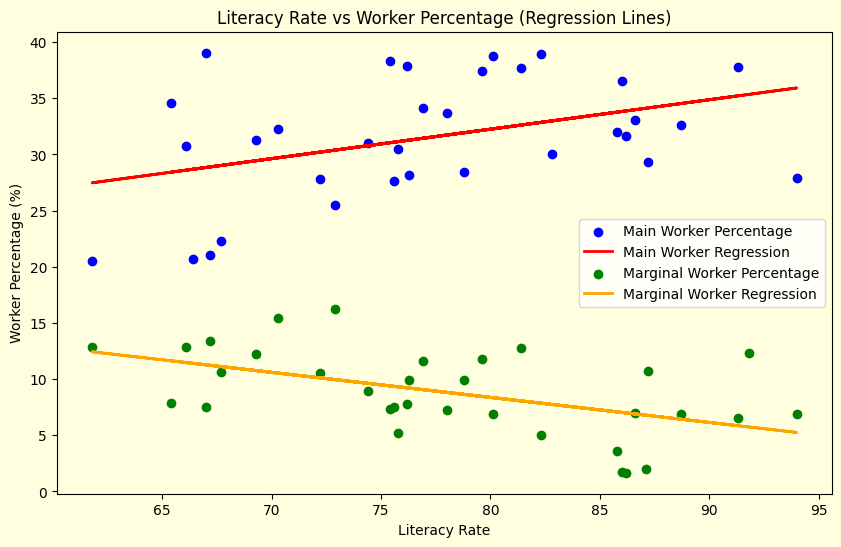

In [9]:
# NOW, Plotting regression lines on a single plot
plt.figure(figsize=(10, 6),facecolor='lightyellow')
ax=plt.gca()
ax.set_facecolor('lightyellow')

# Scatter plot and regression line for main worker percentage
plt.scatter(population_data_clean_main['Literacy_rates'], population_data_clean_main['main_worker_percentage'], color='blue', label='Main Worker Percentage')
plt.plot(population_data_clean_main['Literacy_rates'], lm_main.predict(population_data_clean_main['Literacy_rates']), color='red', linewidth=2, label='Main Worker Regression')

# Scatter plot and regression line for marginal worker percentage
plt.scatter(population_data_clean_marginal['Literacy_rates'], population_data_clean_marginal['marginal_worker_percentage'], color='green', label='Marginal Worker Percentage')
plt.plot(population_data_clean_marginal['Literacy_rates'], lm_marginal.predict(population_data_clean_marginal['Literacy_rates']), color='orange', linewidth=2, label='Marginal Worker Regression')

# Labels and title
plt.title('Literacy Rate vs Worker Percentage (Regression Lines)')
plt.xlabel('Literacy Rate')
plt.ylabel('Worker Percentage (%)')
plt.legend()

# Show plot
plt.show()
